In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df=pd.read_csv("bright_automotive_company.csv")
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [ ]:
df.shape

(1581, 14)

In [ ]:
df.isnull().sum()/len(df)*100

,0
Age,0.000000
Gender,3.352309
Profession,0.379507
Marital_status,0.000000
Education,0.000000
No_of_Dependents,0.000000
Personal_loan,0.000000
House_loan,0.000000
Partner_working,0.000000
Salary,0.822264


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,6
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,13


In [ ]:
null_mask=df.isnull().sum(axis=1).sort_values()
null_row=df[null_mask>1]
null_row

/tmp/ipython-input-6-4059662394.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  null_row=df[null_mask>1]


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
571,33,NaN,Salaried,Married,Graduate,1,Yes,No,No,36300.0,NaN,36300,31000,Sedan
1155,26,NaN,Business,Married,Graduate,3,No,No,No,51400.0,NaN,51400,18000,Sedan
1467,23,NaN,Salaried,Married,Post Graduate,3,Yes,No,No,52900.0,NaN,52900,18000,Sedan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


Observation: Textual/object datatypes has to be encoded into numerical
* 1 The datatype of feature Dependents is different seems to be wrong
* 2 Missing values in dataset





In [ ]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Make'],
      dtype='object')

In [ ]:
df.tail(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.0,31600,31000,Hatchback


In [ ]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [ ]:
df[df["Age"]==120]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
18,120,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000,SUV


#Observation:
1 Wrong enteries in age
2

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [ ]:
categorical_column=df.select_dtypes("object").columns
for i in categorical_column:
  print(df[i].value_counts())
  print(".............................")

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64
.............................
Profession
Salaried    890
Business    685
Name: count, dtype: int64
.............................
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
.............................
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
.............................
No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64
.............................
Personal_loan
Yes    792
No     789
Name: count, dtype: int64
.............................
House_loan
No     1054
Yes     527
Name: count, dtype: int64
.............................
Partner_working
Yes    868
No     713
Name: count, dtype: int64
.............................
Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64
.............................


#Observation
* 1 two wrong enteries in gender feature
* 2 No of dependents is the wrong datatype for that feature
* 3 Wrong data in Make feature

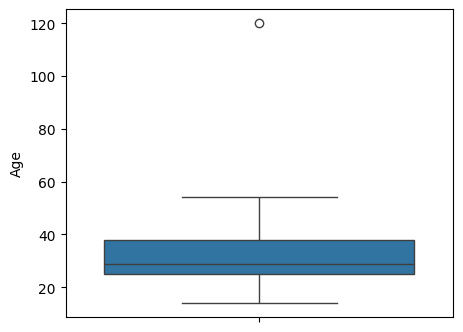

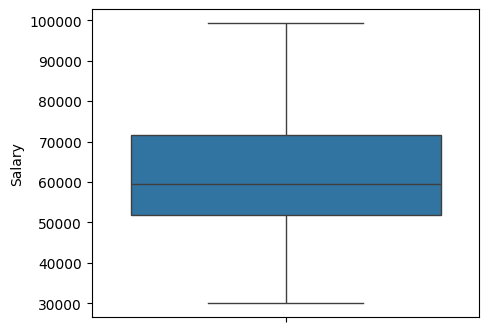

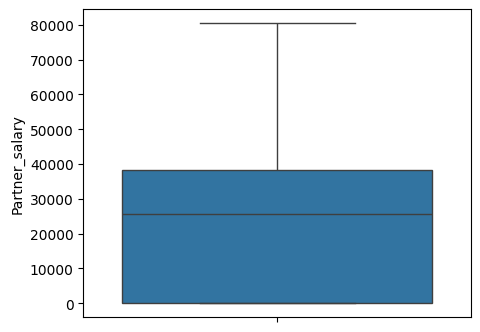

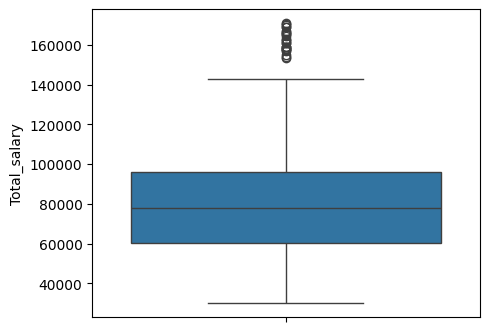

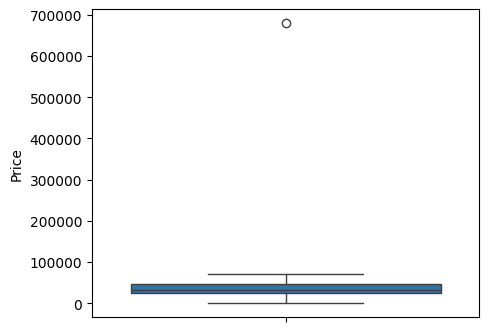

In [ ]:
numerical_column=df.select_dtypes(["int","float"]).columns
for i in numerical_column:
  plt.figure(figsize=(5,4))
  sb.boxplot(df[i])
  plt.show()

# Observation
* 1 One Outlier in age feature
* 2 one outlier in Price feature
* 3 Many outliers in total salary
* 4 No outliers in partener salary and salary

In [ ]:
for i in numerical_column:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lower_limit=q1-1.5*iqr
  upper_limit=q3+1.5*iqr
  lower_limit,upper_limit

In [ ]:
outliers_feature=df[['Age','Price','Total_salary']]

In [ ]:
q1=outliers_feature.quantile(0.25)
q3=outliers_feature.quantile(0.75)
iqr=q3-q1

In [ ]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(Age                5.5
 Price          -8000.0
 Total_salary    7400.0
 dtype: float64,
 Age                 57.5
 Price            80000.0
 Total_salary    149000.0
 dtype: float64)

In [ ]:
df[outliers_feature>upper_limit].count()

,0
Age,1
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


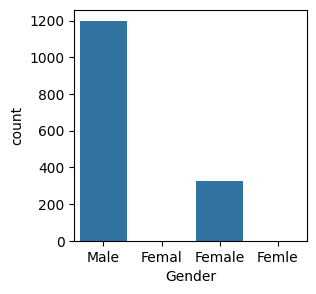

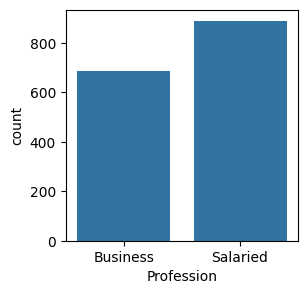

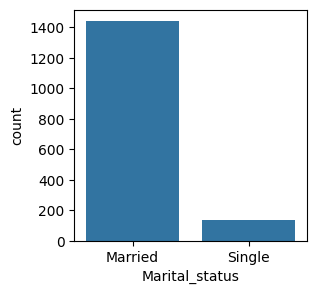

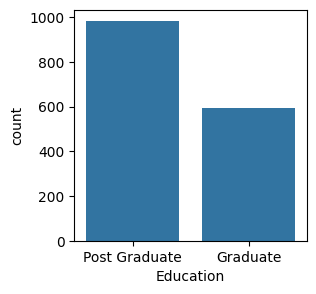

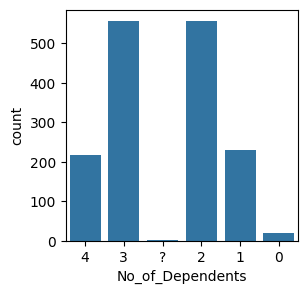

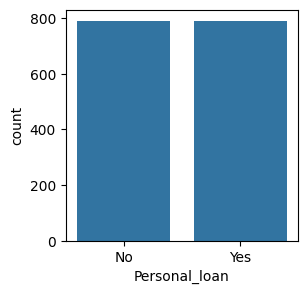

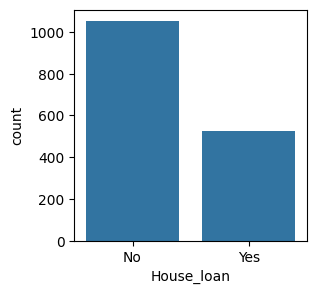

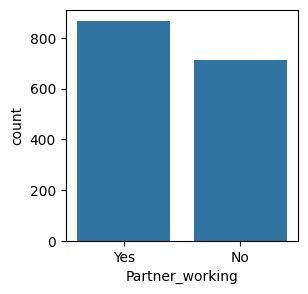

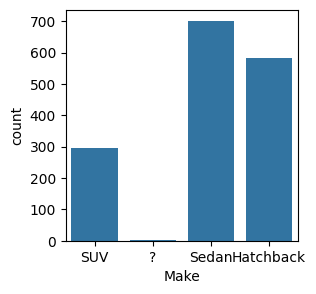

In [ ]:
categorical_column=df.select_dtypes("object").columns
for i in categorical_column:
  plt.figure(figsize=(3,3))
  sb.countplot(data=df,x=i)
  plt.show()

# Observation
* 1 In gender feature no of Male is more in count.
* 2 In Profession feature no of Salaried is more in count.
* 3 In Marital_status feature no of Married is more in count.
* 4 In Education feature no of PostGraduate is more in count.
* 5 In Personal Loan no of No and yes is equal in count.
* 6 In House Loan no of No(Number of pepole with no Loan) is more in count.
* 7 In Partner Working no of yes(Number of people is with partner) is more in count.
* 8 In Make feature sedan car is more in count.

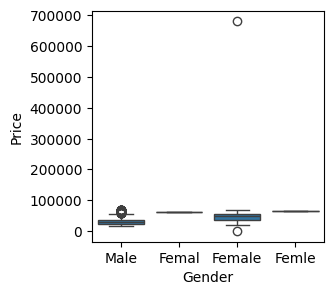

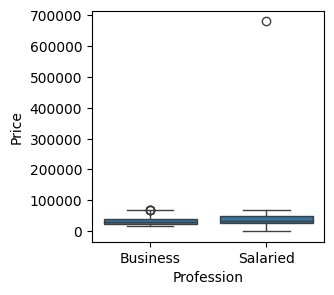

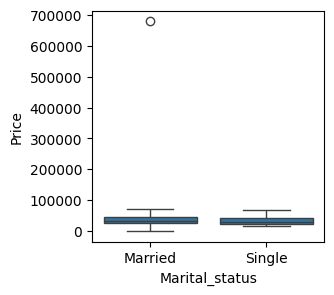

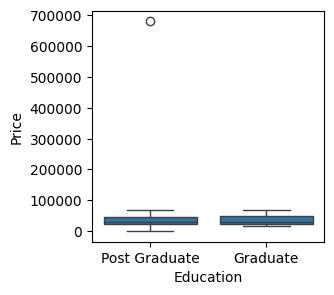

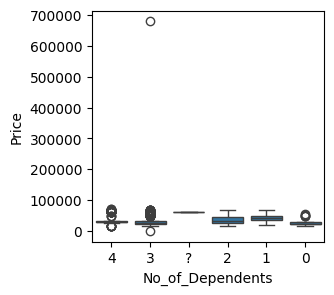

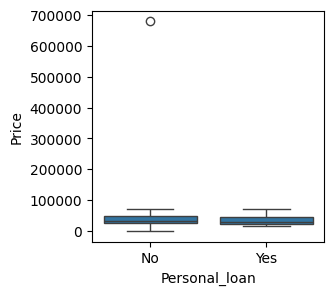

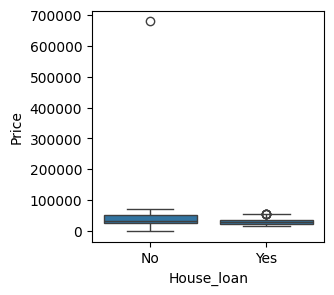

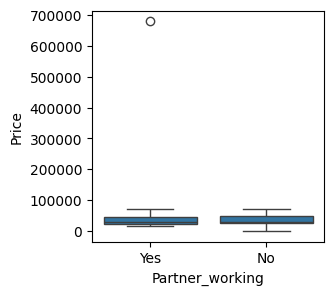

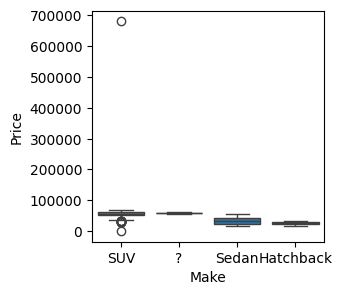

In [ ]:
for i in categorical_column:
  plt.figure(figsize=(3,3))
  sb.boxplot(data=df,x=i,y='Price')
  plt.show()

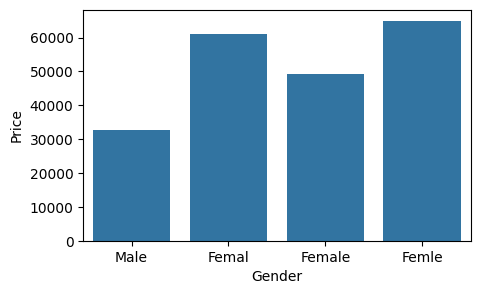

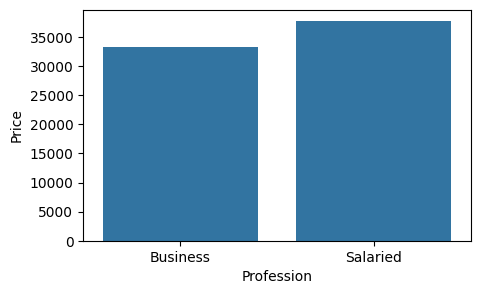

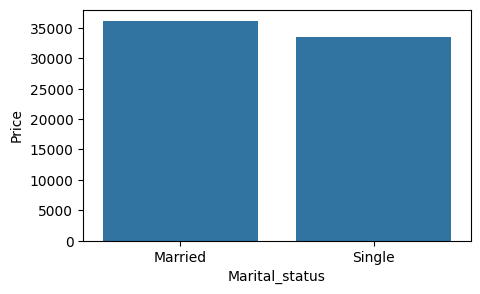

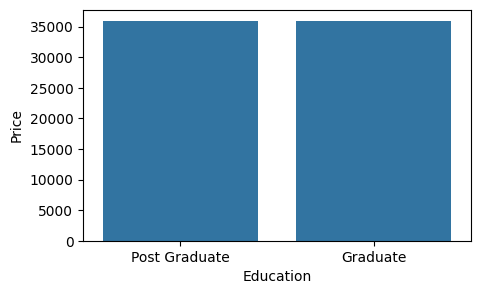

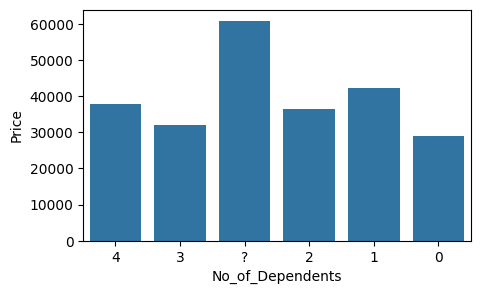

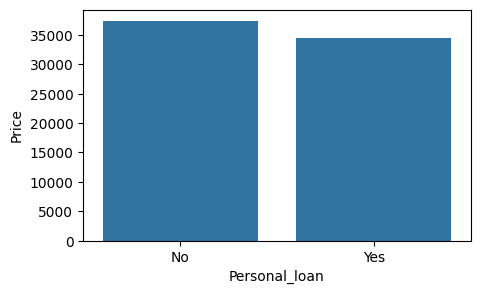

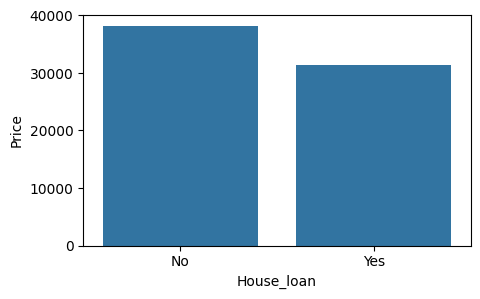

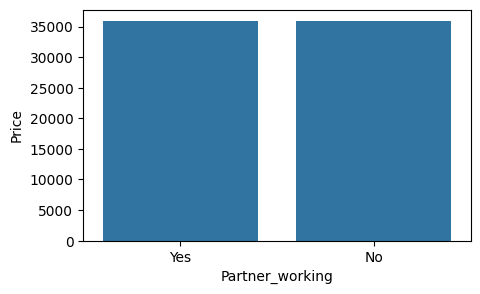

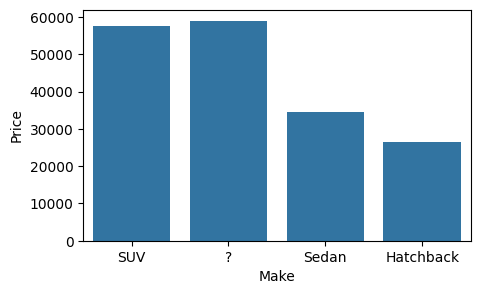

In [ ]:
for i in categorical_column:
  plt.figure(figsize=(5,3))
  sb.barplot(data=df,x=i,y='Price',errorbar=None)
  plt.show()

#Observation
*1 Average price of vehicle is higher for female as compare to men.

In [ ]:
for i in categorical_column:
  print(i)
  print(df.groupby(i)['Price'].mean())
  print("........................")

Gender
Gender
Femal     61000.000000
Female    49305.987768
Femle     65000.000000
Male      32817.347790
Name: Price, dtype: float64
........................
Profession
Profession
Business    33353.284672
Salaried    37803.435955
Name: Price, dtype: float64
........................
Marital_status
Marital_status
Married    36184.378378
Single     33478.260870
Name: Price, dtype: float64
........................
Education
Education
Graduate         35907.718121
Post Graduate    35972.647716
Name: Price, dtype: float64
........................
No_of_Dependents
No_of_Dependents
0    28900.000000
1    42393.013100
2    36571.942446
3    32093.461400
4    37861.751152
?    61000.000000
Name: Price, dtype: float64
........................
Personal_loan
Personal_loan
No     37444.940431
Yes    34457.070707
Name: Price, dtype: float64
........................
House_loan
House_loan
No     38233.451613
Yes    31377.609108
Name: Price, dtype: float64
........................
Partner_working
Partn

<Figure size 500x300 with 0 Axes>

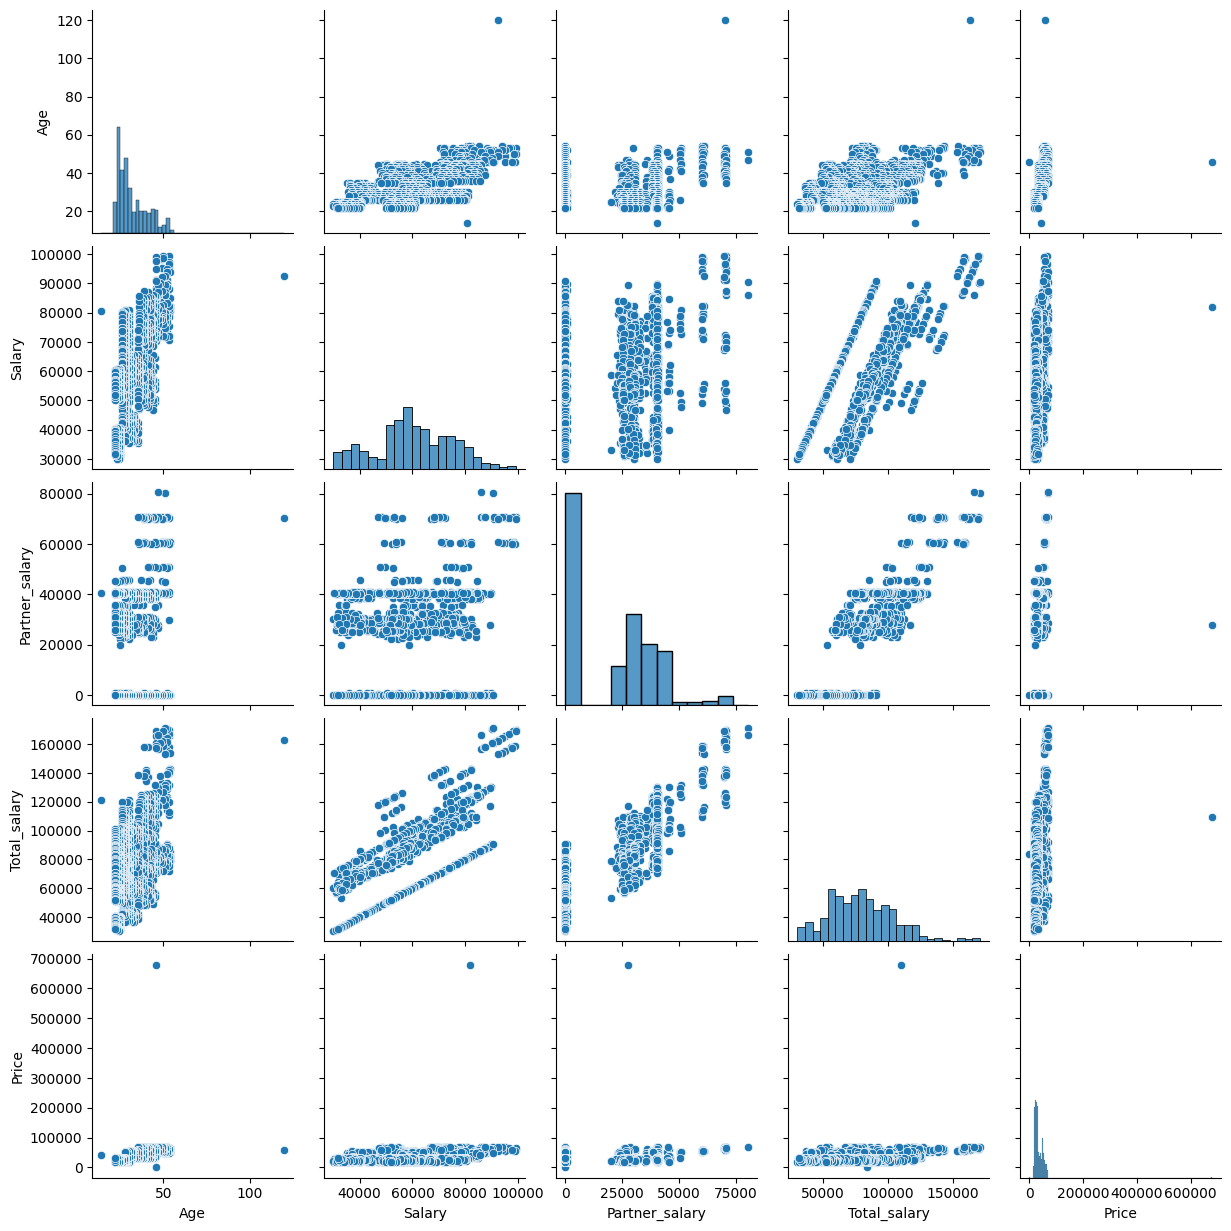

<Figure size 500x300 with 0 Axes>

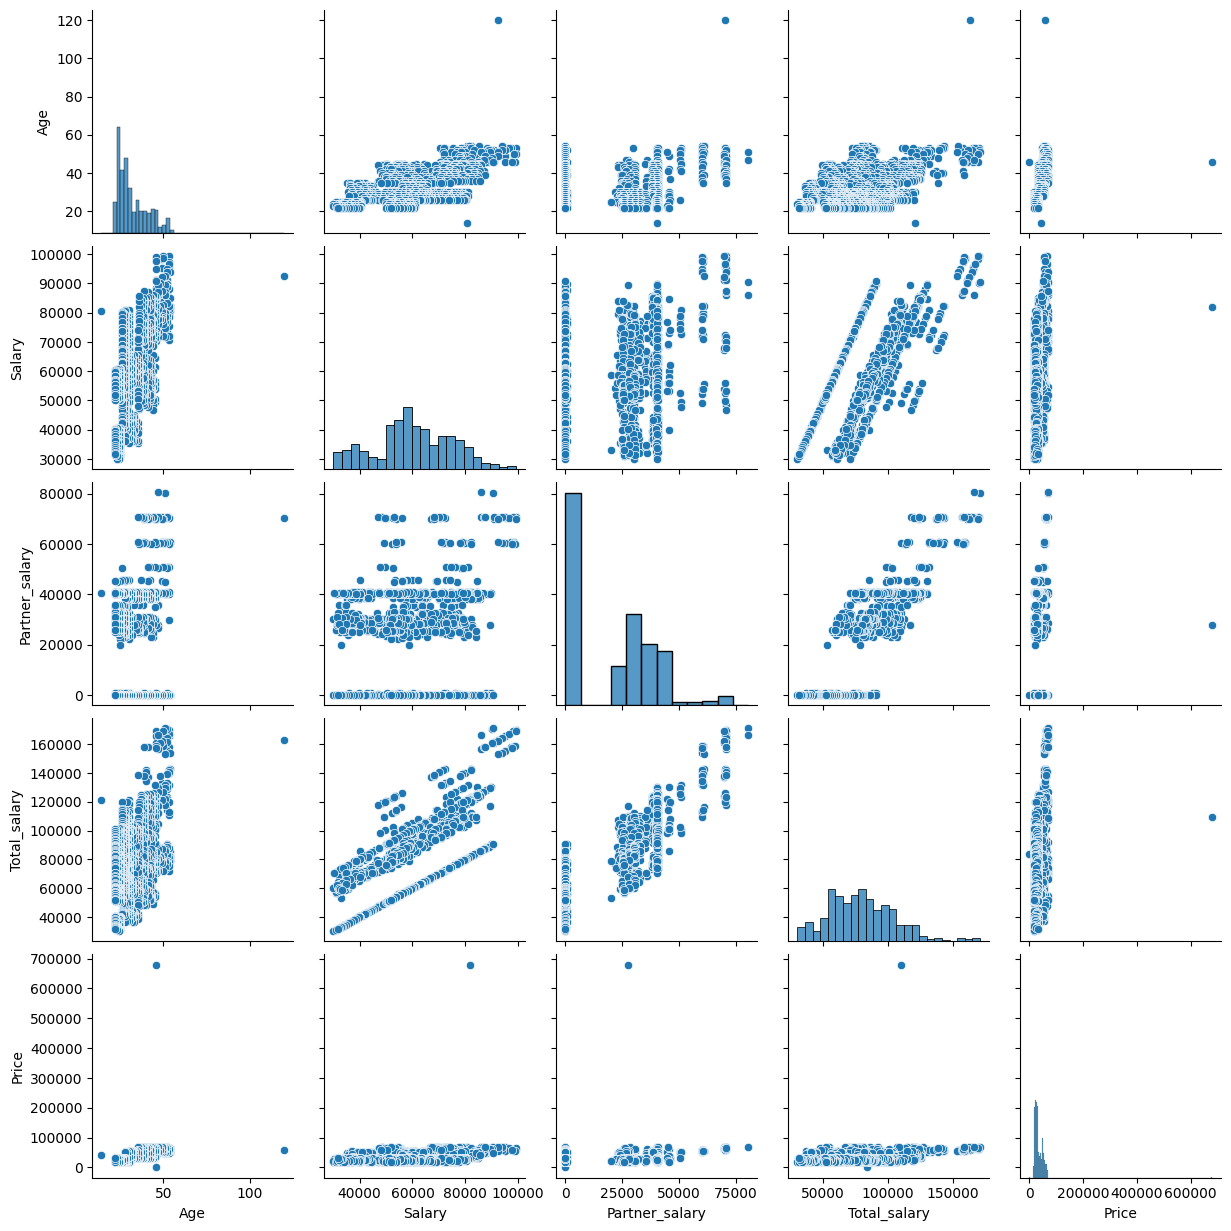

<Figure size 500x300 with 0 Axes>

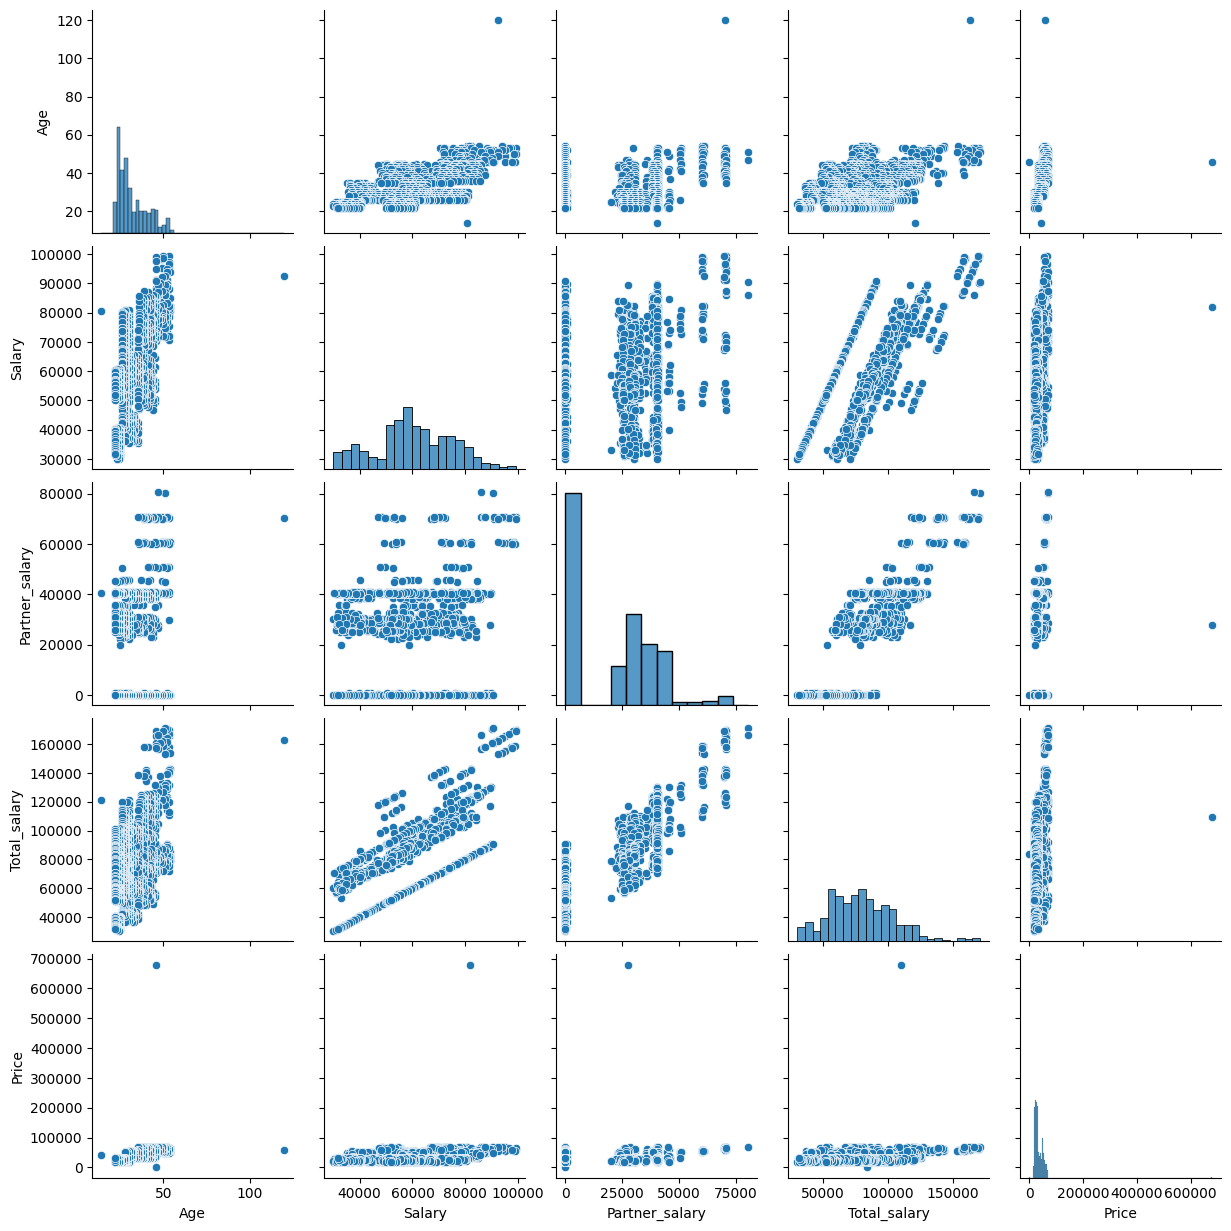

<Figure size 500x300 with 0 Axes>

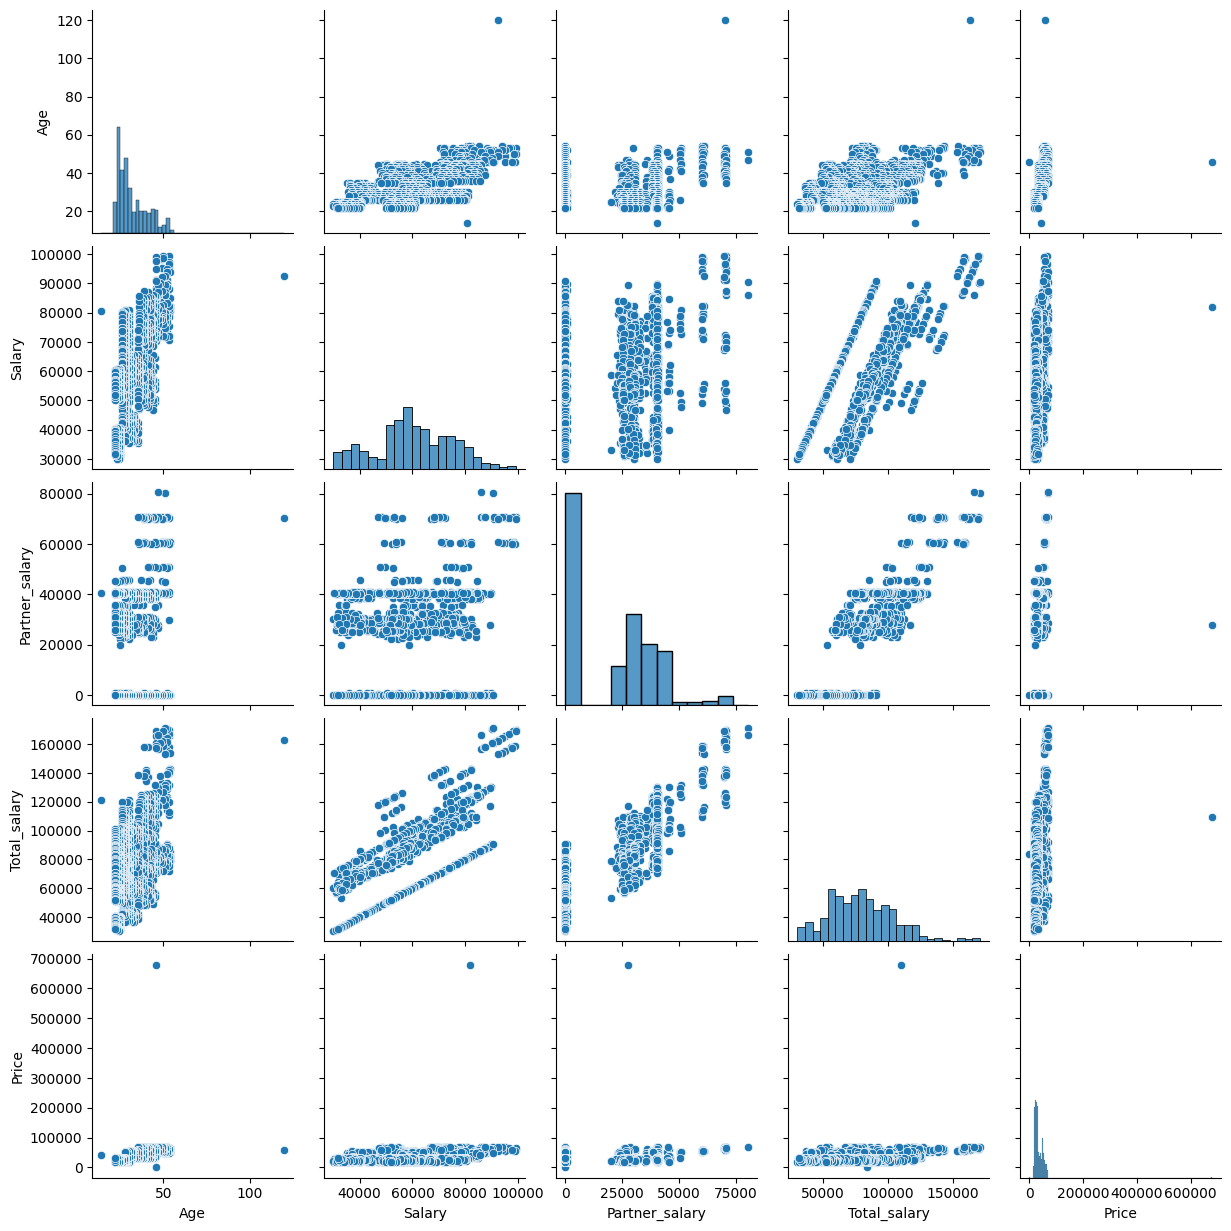

<Figure size 500x300 with 0 Axes>

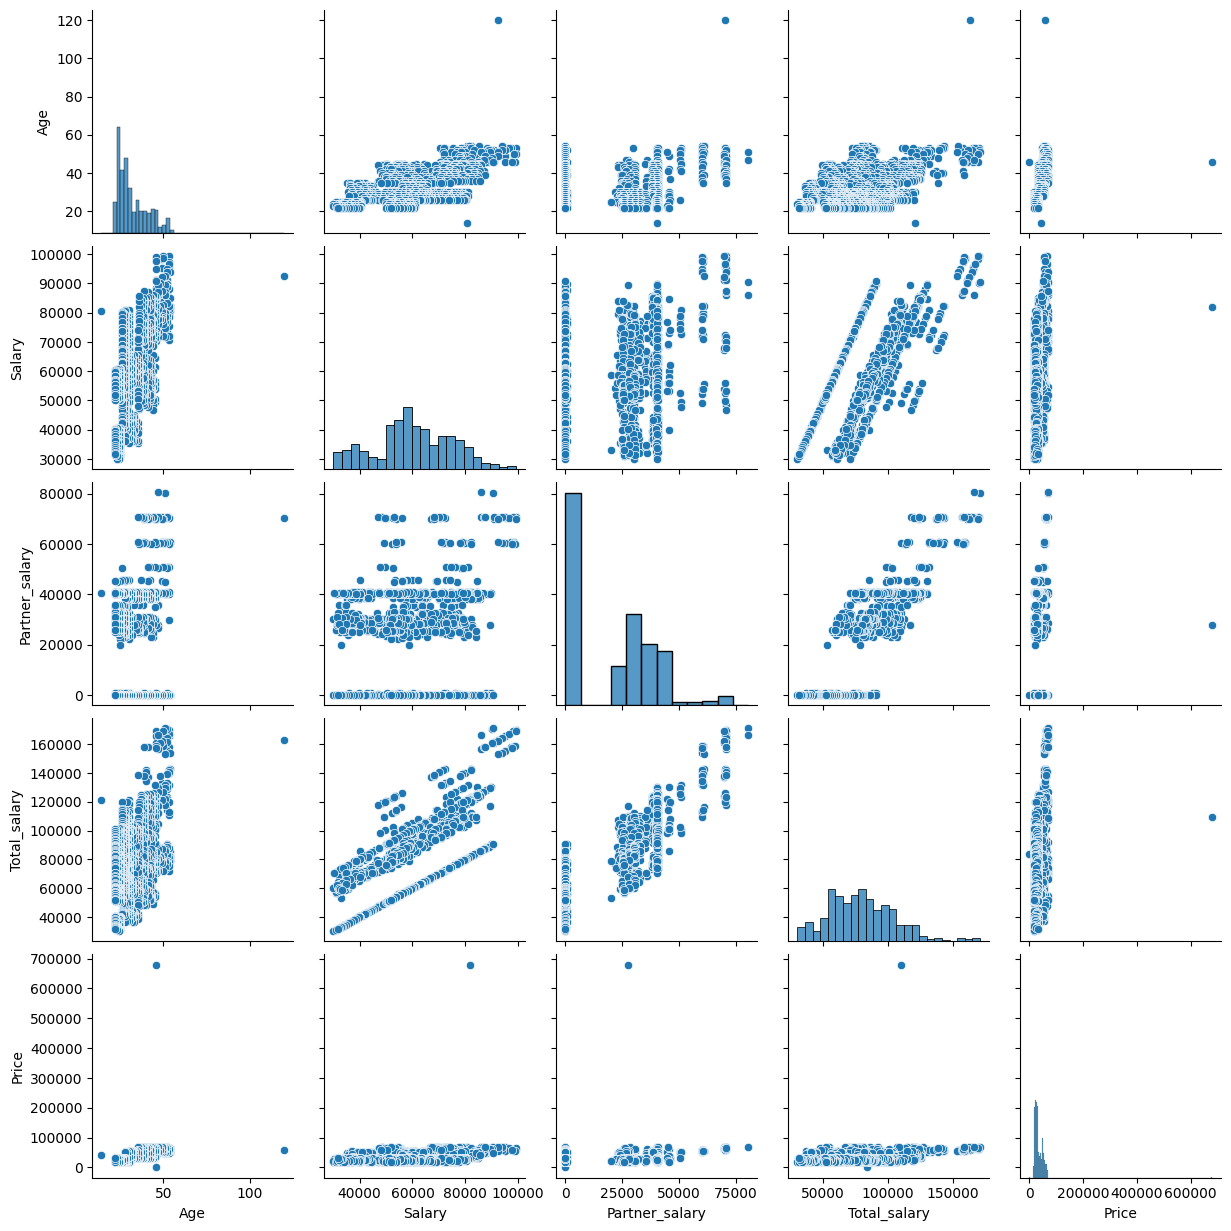

In [ ]:
for i in numerical_column:
  plt.figure(figsize=(5,3))
  sb.pairplot(data=df)
  plt.show()

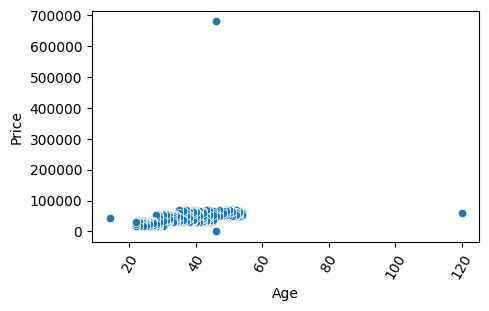

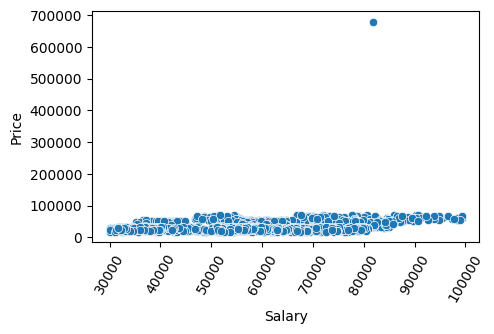

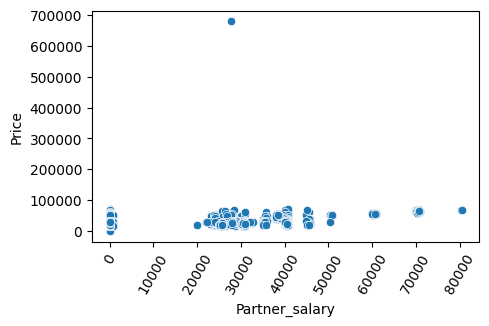

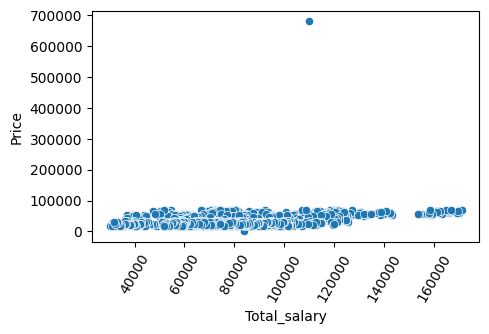

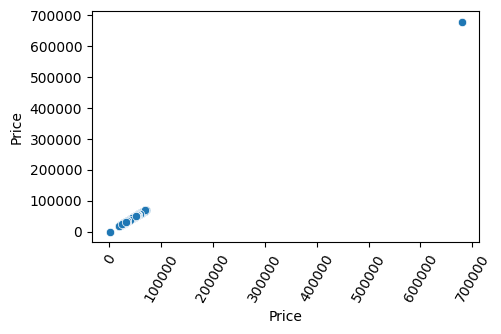

In [ ]:
for i in numerical_column:
  plt.figure(figsize=(5,3))
  sb.scatterplot(data=df,x=i,y='Price')
  plt.xticks(rotation=60)
  plt.show()

#Observation
* There is no changes in pattern

In [ ]:
correlation=df[numerical_column].corr()

<Axes: >

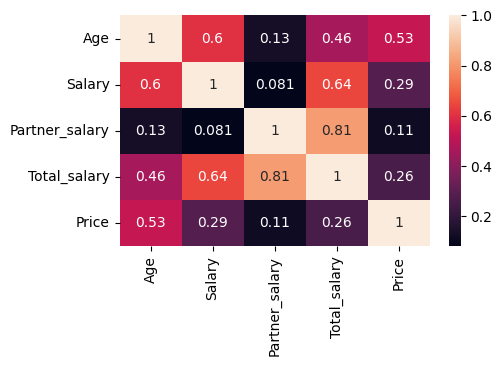

In [ ]:
plt.figure(figsize=(5,3))
sb.heatmap(correlation,annot=True)

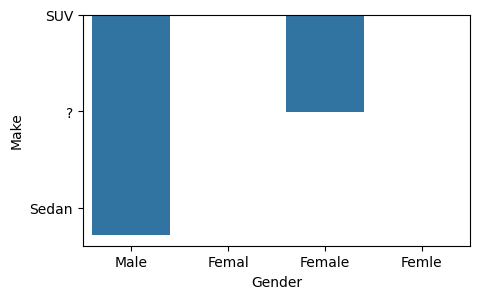

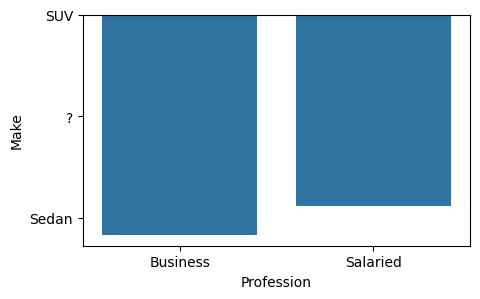

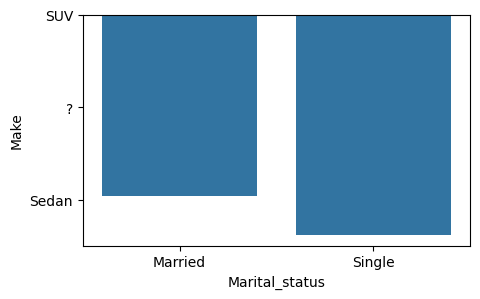

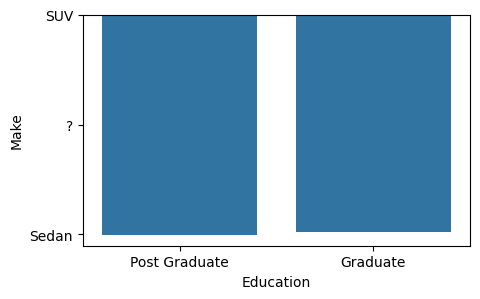

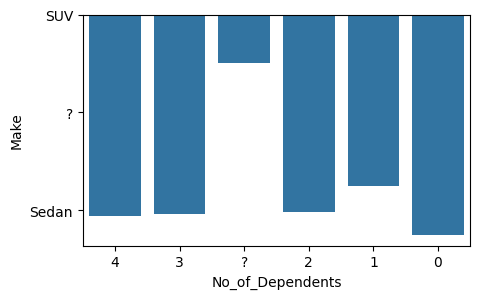

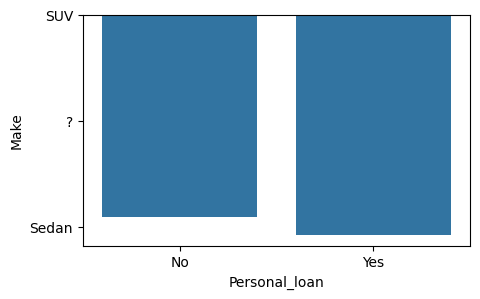

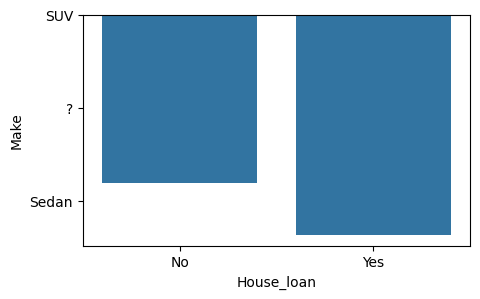

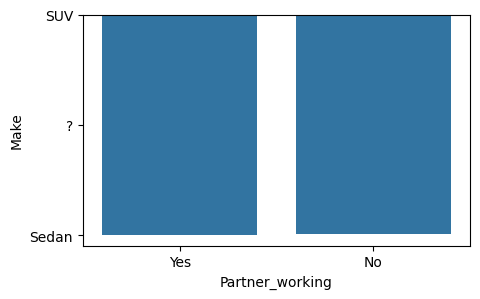

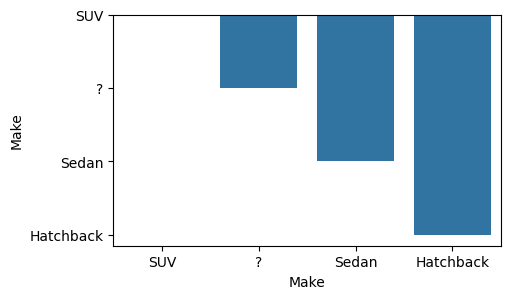

In [ ]:
for i in categorical_column:
  plt.figure(figsize=(5,3))
  sb.barplot(data=df,x=i,y='Make',errorbar=None)
  plt.show()

Correlation is how data is dependent on another thing.
It varies from -1 to 1.


In [ ]:
for i in categorical_column:
  print(pd.crosstab(df['Make'],df[i]))
  print("...........................")


Gender     Femal  Female  Femle  Male
Make                                 
?              0       1      0     1
Hatchback      0      15      0   565
SUV            1     170      1   117
Sedan          0     141      0   516
...........................
Profession  Business  Salaried
Make                          
?                  0         2
Hatchback        290       292
SUV               89       200
Sedan            306       396
...........................
Marital_status  Married  Single
Make                           
?                     2       0
Hatchback           498      84
SUV                 279      16
Sedan               664      38
...........................
Education  Graduate  Post Graduate
Make                              
?                 1              1
Hatchback       220            362
SUV             116            179
Sedan           259            443
...........................
No_of_Dependents   0    1    2    3    4  ?
Make                        

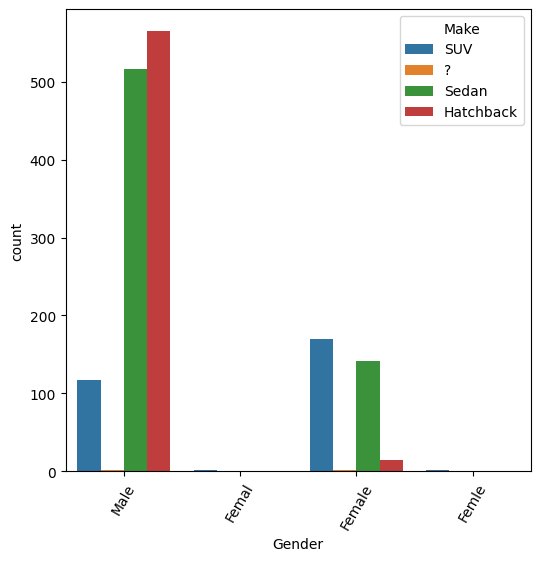

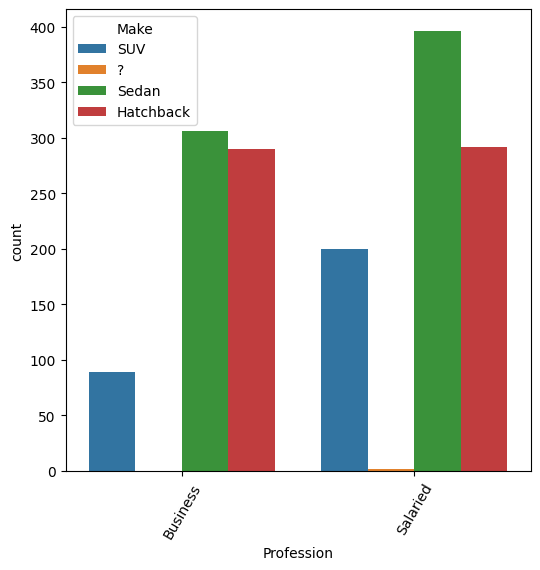

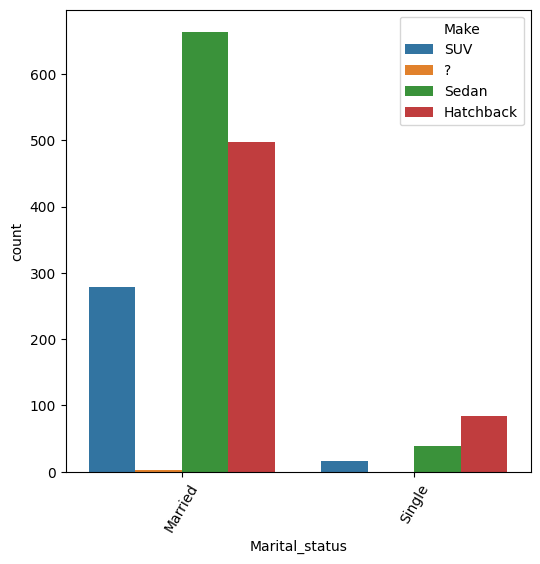

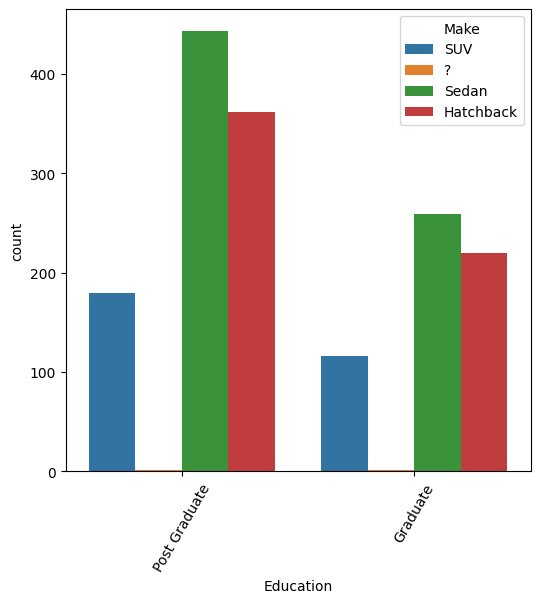

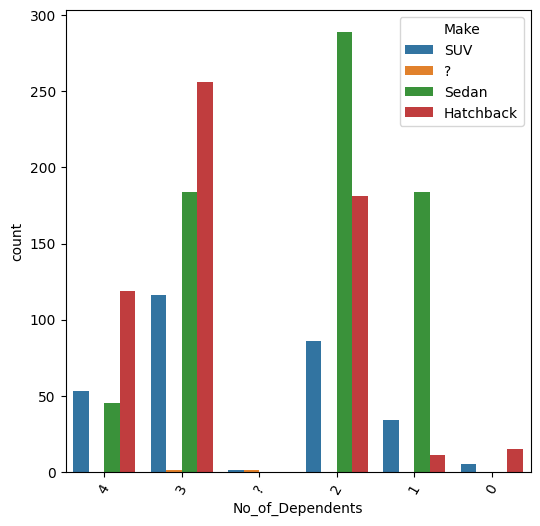

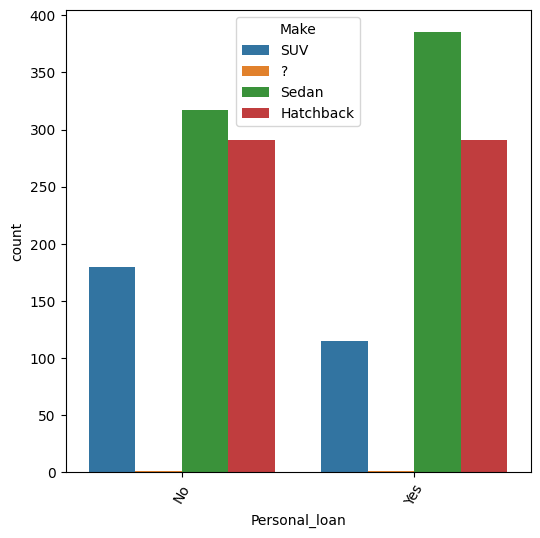

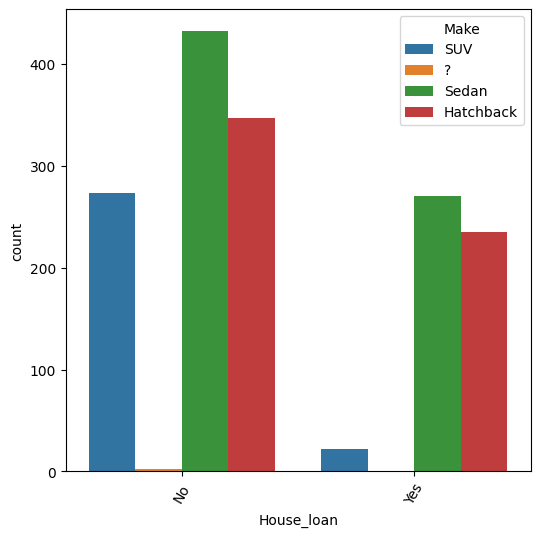

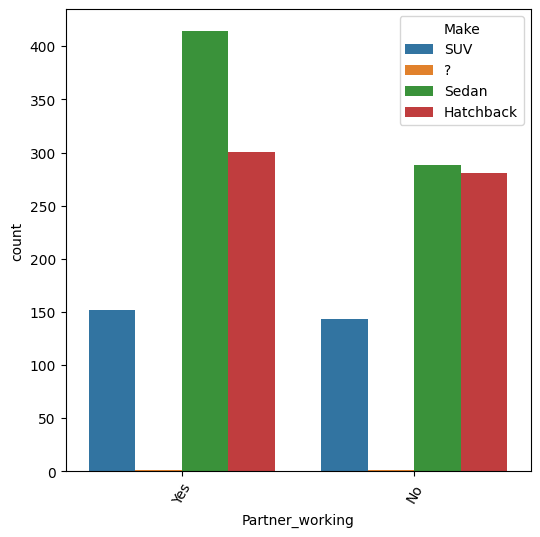

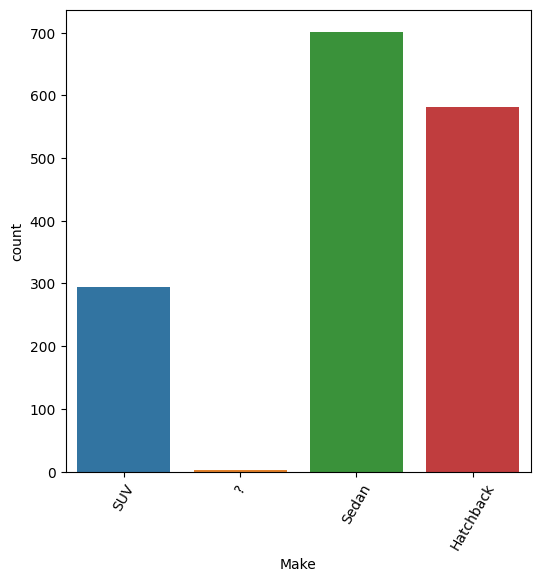

In [ ]:
for i in categorical_column:
  plt.figure(figsize=(6,6))
  sb.countplot(data=df,x=i,hue='Make')
  plt.xticks(rotation=60);
  plt.show()

#Observation:
* 1 Male prefer hatchback cars more and whereas female prefer Suv more.
* 2 Both Buisness and salried peoples prefer sedan more.
* 3 Married people prefer sedan more and single people prefer hatchback more.
* 4 People with both No,Yes Personal_loan prefer sedan .
* 5 People with both No,Yes House_loan prefer sedan .
* 6 People with both No,Yes Partner_working prefer sedan.
* 7 Sedan make is more preferable.

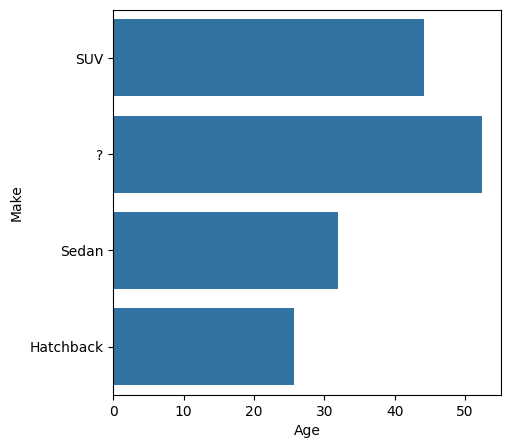

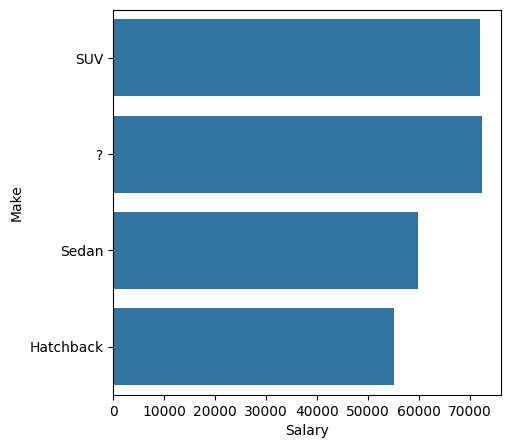

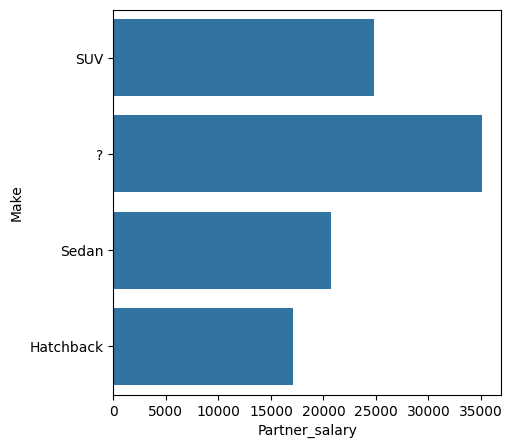

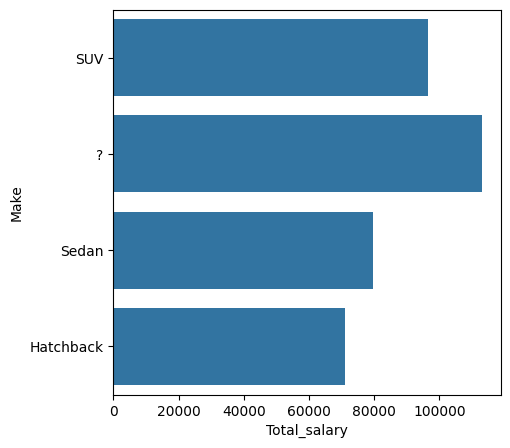

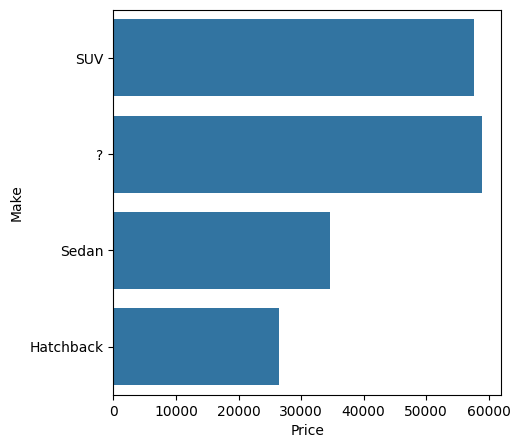

In [ ]:
for i in numerical_column:
  plt.figure(figsize=(5,5))
  sb.barplot(data=df,x=i,y='Make',errorbar=None)
  plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,327
Femal,1
Femle,1


In [ ]:
df['Gender']=df['Gender'].replace(['Femle','Femal'],'Female')

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
df['Make'].value_counts()

,count
Make,
Sedan,702
Hatchback,582
SUV,295
?,2


In [ ]:
df[df['Make']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,NaN,0.0,83700,57000,?


In [ ]:
df['Make'].mode()

,Make
0,Sedan


In [ ]:
df.groupby('Make')['Price'].mean()

,Price
Make,
?,59000.000000
Hatchback,26474.226804
SUV,57681.552542
Sedan,34603.988604


In [ ]:
df['Make']=df['Make'].replace(['?'],'Sedan')

In [ ]:
df['Make'].value_counts()

,count
Make,
Sedan,704
Hatchback,582
SUV,295


In [ ]:
df['No_of_Dependents'].value_counts()

,count
No_of_Dependents,
3,557
2,556
1,229
4,217
0,20
?,2


In [ ]:
df[df['No_of_Dependents']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,Sedan
8,52,Male,Salaried,Married,Post Graduate,?,No,No,No,89400.0,0.0,89400,61000,SUV


In [ ]:
# Calculate the mode from the cleaned dataframe (excluding rows 3 and 13)
# Ensure you convert to string first before replacing '?'
df_cleaned = df.drop(index=[3, 18])
# Convert to string before replacing '?' to avoid errors if there are other non-numeric characters
df_cleaned['No_of_Dependents'] = df_cleaned['No_of_Dependents'].astype(str).replace(['?'], '0') # Replace '?' with a placeholder like '0'
mode_of_dependents = df_cleaned['No_of_Dependents'].astype('int').mode()

# Replace '?' in the original df with the calculated mode
# Convert to string first before replacing '?' to handle potential mixed types
df['No_of_Dependents'] = df['No_of_Dependents'].astype(str).replace(['?'], str(mode_of_dependents[0])) # Replace with the actual mode
df['No_of_Dependents'] = df['No_of_Dependents'].astype('int')

print(mode_of_dependents)

0    2
1    3
Name: No_of_Dependents, dtype: int64


* if categorical variable use mode
* if numerical with outliers use median
* if numerical use mean


In [ ]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

In [ ]:
print(" No. of rows before dropping duplicates :", df_copy.shape[0])
df_copy.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df_copy.shape[0])

 No. of rows before dropping duplicates : 1581
 No. of rows after dropping duplicates : 1581


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,6
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,13


In [ ]:
df_copy

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500.0,70300.0,142800,61000,Sedan
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback


In [ ]:
df_copy['Gender'].mode()[0]

'Male'

In [ ]:
df_copy['Gender'] = df_copy['Gender'].fillna(df_copy['Gender'].mode()[0])

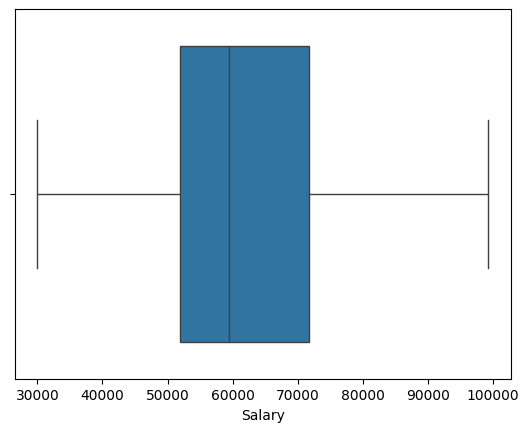

In [ ]:
sb.boxplot(data=df_copy, x='Salary');


In [ ]:
df_copy['Salary'] = df_copy['Salary'].fillna(df_copy['Salary'].mean())

In [ ]:
df_copy.isnull().sum()

,0
Age,0
Gender,0
Profession,6
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_copy[['Profession']] = imputer.fit_transform(df_copy[['Profession']])

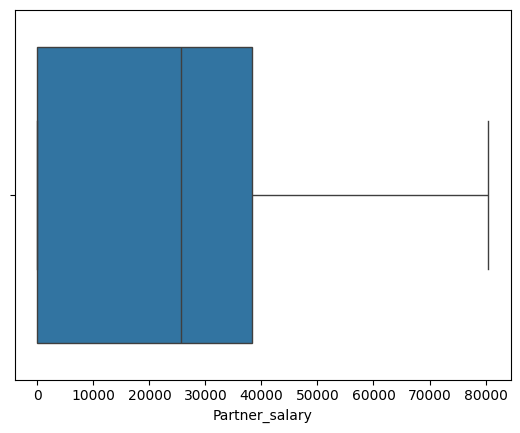

In [ ]:
sb.boxplot(data=df_copy, x='Partner_salary');

In [ ]:
# Imputer with median strategy
imputer = SimpleImputer(strategy='median')
df_copy[['Partner_salary']] = imputer.fit_transform(df_copy[['Partner_salary']])

In [ ]:
df_copy.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [ ]:
df_copy.to_csv('df_copy1.csv', index=False)

In [ ]:
df_copy2= pd.read_csv('df_copy1.csv')

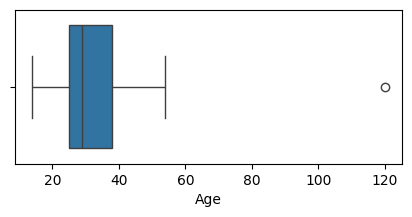

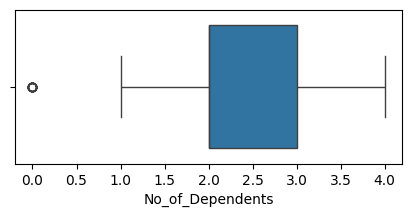

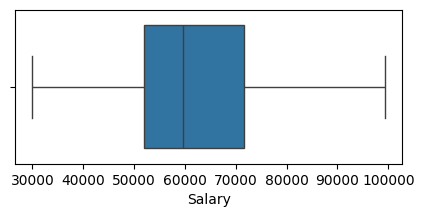

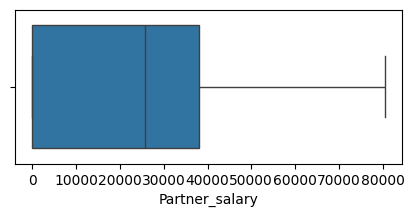

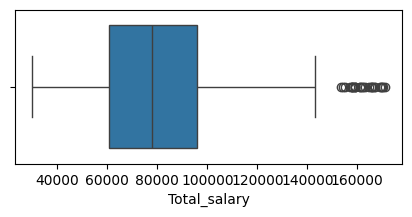

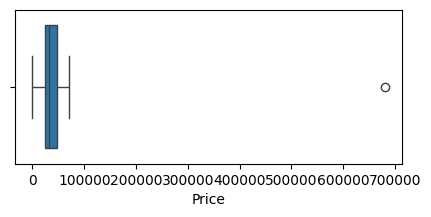

In [ ]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sb.boxplot(data=df_copy2,x=i);

In [ ]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['Age'].quantile(0.25)
Q3 = df_copy2['Age'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(np.float64(5.5), np.float64(57.5))

In [ ]:
# Filter out outliers
df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
18,120,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000,SUV


In [ ]:
df_copy2['Age'].quantile(0.99)


np.float64(53.0)

In [ ]:
df_copy2['Age'].describe()

,Age
count,1581.000000
mean,31.952562
std,8.712549
min,14.000000
25%,25.000000
50%,29.000000
75%,38.000000
max,120.000000


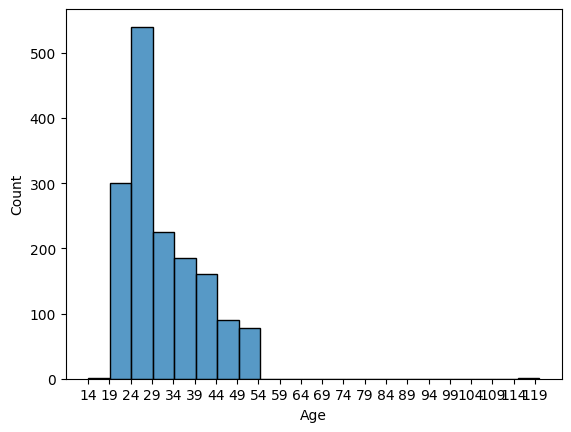

In [ ]:
sb.histplot(data=df_copy2, x='Age',binwidth=5)
plt.xticks(np.arange(14,120,5));

In [ ]:
df_copy2['Age'] =np.where(df_copy2['Age']<= lower,df_copy2['Age'].median(),df_copy2['Age'])
df_copy2['Age'] =np.where(df_copy2['Age']>= upper,df_copy2['Age'].median(),df_copy2['Age'])

In [ ]:
 df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [ ]:
df_copy2['Age'] =np.where(df_copy2['Age'] ==14,29,df_copy2['Age'])

In [ ]:
from scipy.stats import zscore
df_copy2['zscore'] = zscore(df_copy2['Price'])
df_copy2[df_copy2['zscore'].abs() > 3]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,zscore
26,46.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,81900.0,27800.0,109700,680000,SUV,30.42499


In [ ]:
df_copy2['Price'].describe()

,Price
count,1581.000000
mean,35948.170778
std,21175.212108
min,58.000000
25%,25000.000000
50%,31000.000000
75%,47000.000000
max,680000.000000


In [ ]:
df_copy2['Price'].quantile(0.99)

np.float64(68000.0)

<Axes: xlabel='Price', ylabel='Count'>

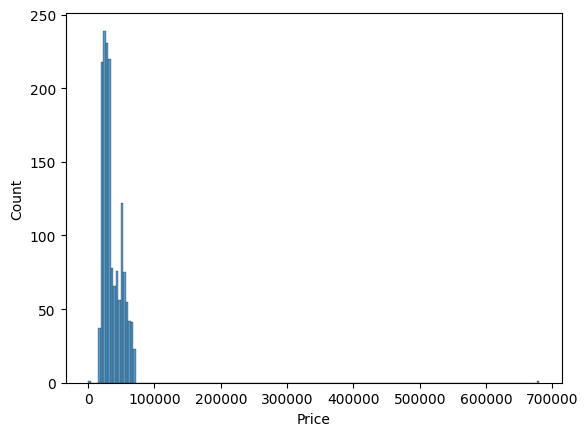

In [ ]:
sb.histplot(data=df_copy2, x='Price')
#plt.xticks(np.arange(58,680000,1000));

In [ ]:
df_copy2['Price'] =np.where(df_copy2['zscore'].abs()>3,df_copy2['Price'].median(),df_copy2['Price'])

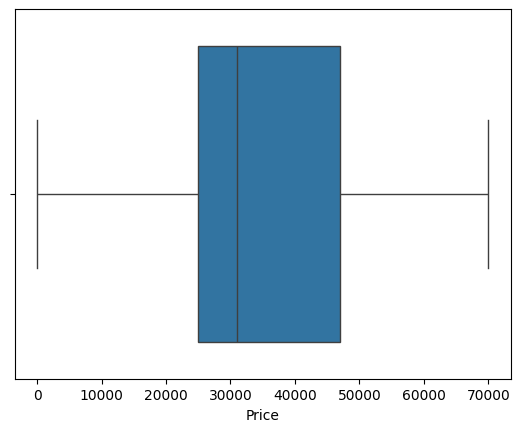

In [ ]:
sb.boxplot(data=df_copy2, x='Price');

In [ ]:
df_copy2['Price'] =np.where(df_copy2['Price']==58,df_copy2['Price'].median(),df_copy2['Price'])

In [ ]:
# Treating outliers in Total_salary
Q1 = df_copy2['Total_salary'].quantile(0.25)
Q3 = df_copy2['Total_salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(np.float64(7400.0), np.float64(149000.0))

In [ ]:
df_copy2[(df_copy2['Total_salary'] <= lower) | (df_copy2['Total_salary'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,zscore
0,53.0,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000.0,SUV,1.183448
1,53.0,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000.0,SUV,1.183448
2,53.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000.0,SUV,0.994488
17,49.0,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100.0,70600.0,165700,64000.0,SUV,1.325168
18,29.0,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000.0,SUV,1.041728
19,49.0,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400.0,60600.0,159000,54000.0,SUV,0.852768
29,46.0,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300.0,70700.0,169000,61000.0,SUV,1.183448
30,46.0,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900.0,70700.0,165600,67000.0,SUV,1.466888
31,46.0,Male,Business,Married,Graduate,2,Yes,No,Yes,91100.0,70000.0,161100,66000.0,SUV,1.419648
41,53.0,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600.0,70300.0,166900,66000.0,SUV,1.419648


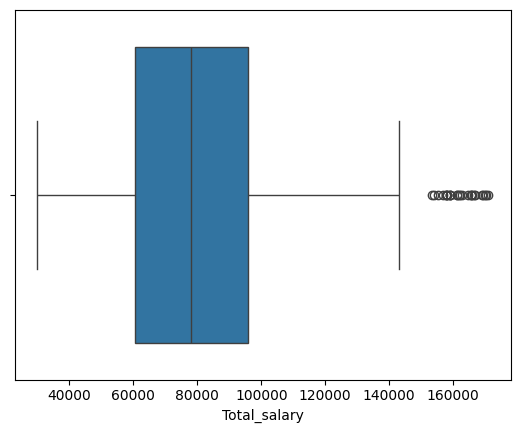

In [ ]:
sb.boxplot(data=df_copy2, x='Total_salary');

In [ ]:
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] <= lower,lower,df_copy2['Total_salary'])
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] >= upper,upper,df_copy2['Total_salary'])

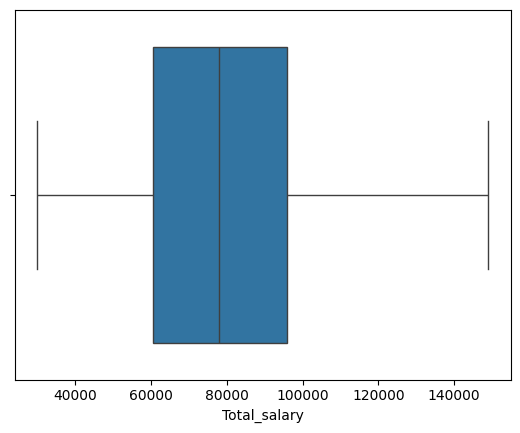

In [ ]:
sb.boxplot(data=df_copy2, x='Total_salary');

In [ ]:
df_copy2.drop('zscore',axis=1, inplace=True)
df_copy2.to_csv('df_copy3.csv', index=False)

## 3.5 Encoding

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)


In [ ]:
df_3= pd.read_csv('df_copy3.csv')

In [ ]:
df_3.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53.0,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,149000.0,61000.0,SUV
1,53.0,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,149000.0,61000.0,SUV
2,53.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,149000.0,57000.0,SUV
3,53.0,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500.0,70300.0,142800.0,61000.0,Sedan
4,53.0,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900.0,57000.0,SUV


In [ ]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])


In [ ]:
cat_variables.columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='object')

In [ ]:
cat_variables.head()

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,Female,Salaried,Married,Graduate,Yes,No,Yes,Sedan
4,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV


In [ ]:
cat_variables['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [ ]:
cat_variables['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [ ]:
# 1. Ordinal encoding
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']))
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes)
cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= False).codes

['Post Graduate', 'Post Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', ..., 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate']
Length: 1581
Categories (2, object): ['Graduate' < 'Post Graduate']
[1 1 1 ... 0 0 0]


In [ ]:
# 2. Nominal encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

Marital_status ;
['Married', 'Married', 'Married', 'Married', 'Married', ..., 'Single', 'Married', 'Single', 'Married', 'Married']
Length: 1581
Categories (2, object): ['Married', 'Single']
[0 0 0 ... 1 0 0]
----------------------------------------
Personal_loan ;
['No', 'Yes', 'No', 'Yes', 'No', ..., 'No', 'No', 'No', 'Yes', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[0 1 0 ... 0 1 0]
----------------------------------------
House_loan ;
['No', 'No', 'No', 'No', 'No', ..., 'Yes', 'No', 'Yes', 'Yes', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[0 0 0 ... 1 1 0]
----------------------------------------
Partner_working ;
['Yes', 'Yes', 'Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No', 'No', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[1 1 1 ... 0 0 0]
----------------------------------------
Make ;
['SUV', 'SUV', 'SUV', 'Sedan', 'SUV', ..., 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback']
Length: 1581
Categories (3, object): ['Hatchback',

In [ ]:
# 3. One Hot encoding
pd.get_dummies(cat_variables[['Gender','Profession']],dtype='int')

,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,0,1,1,0
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,0,1
...,...,...,...,...
1576,0,1,0,1
1577,0,1,1,0
1578,0,1,1,0
1579,0,1,1,0


In [ ]:
for i in ['Gender','Profession']:
    print(pd.get_dummies(cat_variables[i],dtype='int'))

      Female  Male
0          0     1
1          1     0
2          1     0
3          1     0
4          0     1
...      ...   ...
1576       0     1
1577       0     1
1578       0     1
1579       0     1
1580       0     1

[1581 rows x 2 columns]
      Business  Salaried
0            1         0
1            0         1
2            0         1
3            0         1
4            0         1
...        ...       ...
1576         0         1
1577         1         0
1578         1         0
1579         1         0
1580         0         1

[1581 rows x 2 columns]


In [ ]:
cat_variables.head(2)

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,0,1,0,0,1,1
1,Female,Salaried,0,1,1,0,1,1


In [ ]:
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Gender','Profession'], dtype=int)
cat_variables_encoded.head()

,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,0,1,0,0,1,1,0,1,1,0
1,0,1,1,0,1,1,1,0,0,1
2,0,1,0,0,1,1,1,0,0,1
3,0,0,1,0,1,2,1,0,0,1
4,0,1,0,0,1,1,0,1,0,1


In [ ]:
cat_variables_encoded

,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,0,1,0,0,1,1,0,1,1,0
1,0,1,1,0,1,1,1,0,0,1
2,0,1,0,0,1,1,1,0,0,1
3,0,0,1,0,1,2,1,0,0,1
4,0,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1576,1,0,0,1,0,0,0,1,0,1
1577,0,0,0,0,0,0,0,1,1,0
1578,1,0,0,1,0,0,0,1,1,0
1579,0,0,1,1,0,0,0,1,1,0


In [ ]:
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53.0,4,99300.0,70700.0,149000.0,61000.0,0,1,0,0,1,1,0,1,1,0
1,53.0,4,95500.0,70300.0,149000.0,61000.0,0,1,1,0,1,1,1,0,0,1
2,53.0,3,97300.0,60700.0,149000.0,57000.0,0,1,0,0,1,1,1,0,0,1
3,53.0,2,72500.0,70300.0,142800.0,61000.0,0,0,1,0,1,2,1,0,0,1
4,53.0,3,79700.0,60200.0,139900.0,57000.0,0,1,0,0,1,1,0,1,0,1


In [ ]:
df_encoded.to_csv('df_encoded', index=False)

In [ ]:
df_TrainTestSplit= pd.read_csv('df_encoded')

In [ ]:
X = df.drop('Price', axis=1)  # Features
y = df['Price']              # Target


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

In [ ]:
X_train.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Make
467,36,Female,Salaried,Married,Graduate,1,No,No,No,57200.0,0.0,57200,Sedan
166,45,Male,Business,Married,Graduate,4,No,No,No,55500.0,0.0,55500,SUV
80,52,Male,Business,Single,Post Graduate,2,No,No,No,89900.0,0.0,89900,SUV
272,42,Female,Salaried,Single,Graduate,2,No,No,No,53700.0,0.0,53700,SUV
559,33,Female,Salaried,Married,Post Graduate,2,Yes,No,No,59200.0,0.0,59200,Sedan


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

In [ ]:
cat_cols=['No_of_Dependents', 'Marital_status', 'Education', 'Personal_loan', 'House_loan',
 'Partner_working', 'Make', 'Gender_Female', 'Gender_Male','Profession_Business', 'Profession_Salaried']
num_cols= ['Age','Salary', 'Partner_salary', 'Total_salary']

In [ ]:
# 1. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(X_val[num_cols])

In [ ]:
Xtrain_scaled_MinMax=pd.DataFrame(Xtrain_scaled_MinMax,columns=X_train[num_cols].columns)
Xval_scaled_MinMax=pd.DataFrame(Xval_scaled_MinMax,columns=X_val[num_cols].columns)

In [ ]:
# Manually checking MinMax
(36-X_val['Age'].min())/(X_val['Age'].max()-X_val['Age'].min())

0.4375

In [ ]:
Xtrain_scaled_MinMax.head(2)

,Age,Salary,Partner_salary,Total_salary
0,0.207547,0.392496,0.0,0.193732
1,0.292453,0.367965,0.0,0.181624


In [ ]:
Xtrain_scaled_MinMax.describe()

,Age,Salary,Partner_salary,Total_salary
count,1264.000000,1254.000000,1179.000000,1264.000000
mean,0.169640,0.439715,0.283859,0.354203
std,0.083545,0.210281,0.275325,0.180547
min,0.000000,0.000000,0.000000,0.000000
25%,0.103774,0.317460,0.000000,0.220620
50%,0.141509,0.427850,0.361072,0.342593
75%,0.226415,0.603175,0.538787,0.470264
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 2. z-score Scaling (standardization)
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [ ]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [ ]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,Age,Salary,Partner_salary,Total_salary
count,1264.00,1254.00,1179.00,1264.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.03,-2.09,-1.03,-1.96
25%,-0.79,-0.58,-1.03,-0.74
50%,-0.34,-0.06,0.28,-0.06
75%,0.68,0.78,0.93,0.64
max,9.94,2.67,2.60,3.58


In [ ]:
# 2. z-score Scaling (standardization)
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [ ]:
# Manually checking z-scores
(45- X_train['Age'].mean())/X_train['Age'].std()

np.float64(1.470022470118741)

In [ ]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols].reset_index(drop=True)],axis=1)

KeyError: "['Gender_Female', 'Gender_Male', 'Profession_Business', 'Profession_Salaried'] not in index"

In [ ]:
scaled_train.to_csv('Scaled_data_train',index=False)
scaled_test.to_csv('Scaled_data_val',index=False)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop('Price', axis=1)
y = df_TrainTestSplit['Price']

# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

# Lodaing the scaled data sets
x_trainFinal= pd.read_csv('Scaled_data_train')
x_valFinal= pd.read_csv('Scaled_data_val')

In [ ]:
# Building a Linear regression model
LR = LinearRegression()
LR.fit(x_trainFinal,y_train)
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

In [ ]:
# Building a knn model
knn = KNeighborsRegressor()
knn.fit(x_trainFinal,y_train)
y_train_pred = knn.predict(x_trainFinal)
y_val_pred = knn.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

In [ ]:
DR=DecisionTreeRegressor()
DR.fit(x_trainFinal,y_train)
y_train_pred = DR.predict(x_trainFinal)
y_val_pred = DR.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train",rmse_train,r2_train)
print('Test',rmse_val,r2_val)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

In [ ]:
results = []
for name, model in models.items():
    model.fit(x_trainFinal, y_train)

    # Predictions
    y_train_pred = model.predict(x_trainFinal)
    y_val_pred = model.predict(x_valFinal)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for name, model in models.items():
    # Cross-validation scores (negative RMSE)
    neg_mse_scores = cross_val_score(model, X_train_processed, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X_train_processed, y_train, scoring='r2', cv=cv)

    cv_rmse_mean = -np.mean(neg_mse_scores)
    cv_r2_mean = np.mean(r2_scores)

    # Train model on full training data
    model.fit(X_train_processed, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val_processed)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "CV_RMSE_(Train)": cv_rmse_mean,
        "CV_R²_(Train)": cv_r2_mean,
        "Val_RMSE": val_rmse,
        "Val_R²": val_r2
    })

# Display final results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Val_RMSE"))

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor()
param_grid = {"n_estimators": [50, 100, 150],"max_depth": [7, 10, 20],
              "min_samples_split": [2, 5, 10]}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE as negative (as required by sklearn)
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(x_trainFinal, y_train)

# Best model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train performance
y_train_pred = best_rf.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation performance
y_val_pred = best_rf.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Best Hyperparameters for Random Forest:")
print(best_params)

print("\n Performance Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor()
param_grid = {"n_estimators": [130, 150, 170],"max_depth": [7, 8, 10],
              "min_samples_split": [5, 7, 9]}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE as negative (as required by sklearn)
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(x_trainFinal, y_train)

# Best model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train performance
y_train_pred = best_rf.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation performance
y_val_pred = best_rf.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Best Hyperparameters for Random Forest:")
print(best_params)

print("\n Performance Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor()
param_grid = {"n_estimators": [190, 200, 110],"max_depth": [20, 12, 18],
              "min_samples_split": [10, 15, 17]}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE as negative (as required by sklearn)
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(x_trainFinal, y_train)

# Best model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train performance
y_train_pred = best_rf.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation performance
y_val_pred = best_rf.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Best Hyperparameters for Random Forest:")
print(best_params)

print("\n Performance Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#pip install xgboost
from xgboost import XGBClassifier


In [ ]:
df_3= pd.read_csv('df_copy3.csv')
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])

In [ ]:
# 1. Ordinal Encoding
cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes

# 2. Nominal Encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes


In [ ]:
# 3. One Hot  Encoding
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Gender','Profession'], dtype=int)

# Concatinating the encoded part and numerical variables
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.to_csv('df_encoded_classification', index=False)

In [ ]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded_classification')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop('Make', axis=1)
y = df_TrainTestSplit['Make']

# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)


In [ ]:
cat_cols=['No_of_Dependents', 'Marital_status', 'Education', 'Personal_loan', 'House_loan',
 'Partner_working','Gender_Female', 'Gender_Male','Profession_Business', 'Profession_Salaried']
num_cols= ['Age','Salary', 'Partner_salary', 'Total_salary', 'Price']

from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)


In [ ]:
Gb=GradientBoostingClassifier()
Gb.fit(Xtrain_scaled_StandardScalar,y_train)
y_train_pred = Gb.predict(Xtrain_scaled_StandardScalar)
y_val_pred = Gb.predict(Xval_scaled_StandardScalar)
print(classification_report(y_train,y_train_pred))
print(classification_report(y_val,y_val_pred))

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}
results = []
for name, model in models.items():
    model.fit(Xtrain_scaled_StandardScalar, y_train)
       # Predictions
    y_train_pred = model.predict(Xtrain_scaled_StandardScalar)
    y_val_pred = model.predict(Xval_scaled_StandardScalar)

    # Metrics
    # Accuracy_train = accuracy_score(y_train, y_train_pred)
    # Precision_train = precision_score(y_train, y_train_pred,average=None)
    # Recall_train = recall_score(y_train, y_train_pred,average=None)
    # F1_score_train = f1_score(y_train, y_train_pred,average=None)

    # Accuracy_test = accuracy_score(y_val, y_val_pred)
    # Precision_test = precision_score(y_val, y_val_pred,average=None)
    # Recall_test = recall_score(y_val, y_val_pred,average=None)
    # F1_score_test = f1_score(y_val, y_val_pred,average=None)
        # Store result
    results.append({
        "Model": name,
        "Accuracy_train": Accuracy_train,
        "Accuracy_test": Accuracy_test,
        # "Precision_train": Precision_train,
        # "Precision_test": Precision_test,
        # "Recall_train": Recall_train,
        # "Recall_test" : Recall_test,
        # "F1_score_train": F1_score_train,
        # "F1_score_test" : F1_score_test

    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df
